In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

print(sys.version)
print(pd.__version__)
print(np.__version__)

3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
1.4.4
1.21.5


---

## 1: Short Answer Questions (25 pts - each question = 5 pts)

a) The following class ```Cart``` and method ```add_to_cart``` are parts of a larger program used by a mobile phone company.  The method ```add_to_cart``` will work when an object of type MobileDevice or of type ServiceContract is passed to it. State whether the method ```add_to_cart``` is a demonstration of the following items (yes/no) and the reasoning (1-2 sentences): 

    1. Inheritance
    2. Polymorphism
    3. Object-Oriented programming
    4. Top-down design
    5. Functional programming

In [2]:
# Method:
class Cart():
    
    def __init__(self):
        self.cart = []
        self.total = 0
    
    def add_to_cart(self, item):
        self.cart.append(item)
        self.total += item.price

---

- a) Your answer here


1. Inheritance:
    * No, this is just an example of an instance of the class MobileDevice or ServiceContract when created can be added to the add_to_cart.
    * Inheritence are cases where subclasses can reuse the behavior from the parent class (ie inherited from)
    
2. Polymorphism:
    * No, this isnt a case of polymorphism as well. Polymorphism is a case best explained with the Class (Animal) and subclasses Dog and Cat -- both inhering a common method (talk) but return different values. So, when called, Cat and Dog objects will return 2 different values (asuming they are meow and woof!). I see polymorphism (in the sense of classes) as a special case of inheritence.
    

3. Object-Oriented programming:
    * Yes. For sure this is case of OOP because both MobileDevice and ServiceContract are classes from which specific instances are created. These objects have methods which allow them to interact with other classes (like, Cart for example) which is the textbook definition of OOP

4. Top-down design:
    * this could be a case of bottom-up design where the problem space (ie shopping mobile devices and signing a service contrat) is the problem space which has been broken down into 3 large component. A typical characteristic of bottom-up deisgn is wehre the pieces are well known and some experimentation is necessary to assemble them into the whole


5. Functional programming:
    * No, this is not an example of functional programming, which by definition passing functions as parameters to other functions. In the above example, we are passing objects to functions of other class-objects. Moreover, the fn programming also involves  writing code that does not change state (ie multiple function will yield the same result) which is not the case here as each object is unique and different from the other

---

b) Suppose you have a long list of digits (0-9) that you want to write to a file.  From a storage standpoint, would it be more efficient to use ASCII or UTF-8 as an encoding? What is the most efficient way to create an even smaller file to store the information?

- b) Your answer here

    * There is no difference between storing data in ASCII or UTF-8 as regards to this character range. 
    * If compression is a requirement, then one can consider BCD(4 bits per digit), 2-base binary values and Huffman compression

c) How would you sanity-check your data? Why is it important to sanity-check your data before you begin your analysis? What could happen if you don't?

- c) Your answer here

    * Sanity testing any dataset is important. Assuming the dataset is accessible with pandas, then I would recommend the following:
    * head (to quickly look at the top few records)
    * tail (to quickly look at the bottom few records)
    * describe (this gives a birds-eye view of metrics like counts, mean, percentiles et). However, thsi works only for numerical data
    * value_counts specifically for non-numerical data
    * df.columns to get a list of columns
    * df.info() ( general information about the object)
    

---

d) How do you determine which variables in your dataset you should check for issues prior to starting an analysis? 

- d) Your answer here

    * It begins with understanding what the dataset is being used for (ie what question is being answere). Followed by a review of the variables (ie columns) and dropping those that are not relevant.
    * For the chosen variable, we identify NaN values, blank/missing values, erronous values etc by running basic commands like df.describe(), df.info() etc. 
    * Especially for numerical data, I would be interested in outlines depending on the mean, medium. max and std deviation - which I can get from df.info()
    * I would also understand the relationship between variable and assess the impact of missing or outlier data. 
    * For example, our final project works with NBA season data (from 1946 till now). For reasons like those above, we eliminated a number of years of data (say, the past couple Covid years with skewed match data)

---

e1) Explain why the following code prints what it does.

In [3]:
def g(): pass
print(type(g))

<class 'function'>


- e1) Your answer here

    * This is of type function and as of Python 3, all built in types (like functions) are classes under the hood.

---

e2) Explain why the following code prints something different.

In [4]:
def g(): pass
print(type(g()))

<class 'NoneType'>


- e2) Your answer here

    * this is because the function g does not return anything when executed
    * the difference between this question and one above, is that here we are executing the function with g() which returns no value, ie NoneType

---

## 2:  General Coding Questions (15 pts - each question 5 pts)

---

a) Using a dictionary comprehension, make a dictionary with the keys being the lowercase vowels (aeiou) and the values being the number of vowels in the example_text (case insensitive). Fill in a dictionary comprehension below so that we get this desired output.

```
example_text = 'Outlook is bright!'
```

expected output:
```
{'i': 2, 'o': 3, 'u': 1}

or

{'a': 0, 'e': 0, 'i': 2, 'o': 3, 'u': 1}
```

In [5]:
example_text = "I love coding in python!"
#example_text = 'Outlook is bright!'

# 2a) Your code here

{x: example_text.lower().count(x) for x in 'aeiou'}

{'a': 0, 'e': 1, 'i': 3, 'o': 3, 'u': 0}

---

b) Below is a data frame of customers that have different cooling systems. Your data science team lead wants the column ```cooling_system``` to be labeled with the integer numbers 1-4 instead of the text as shown below:

- 1 = Air Conditioning / Air Con / AC
- 2 = Heat Pump / HP
- 3 = Evaporative Cooler / EvapCooler / EC
- 4 = Fan

Make a new column called ```cooling_type``` that maps the text values to the new numeric values. Filter out / remove rows with the values that are not included in the mapping above. Print out/display this new data frame. Be sure to list any assumptions also!

In [6]:
import pandas

# creating a data frame from scratch - list of lists

data = [ 
         [101, 'AC'], 
         [102, 'Heat Pump'], 
         [103, 'Air Con'], 
         [104, 'Air Conditioning'],
         [105, 'Fan'],
         [106, 'None'],
         [107, 'EvapCooler'],
         [108, None],
         [109, 'EC'],
         [110, 'Evaporative Cooler'],
         [111, 'geothermal'],
         [112, 8],
         [113, 'Air Con']
       ]

# create a data frame with column names - list of lists

col_names = ['Cust_Number', 'Cooling_System']
df = pandas.DataFrame(data, columns=col_names)
df

,Cust_Number,Cooling_System
0,101,AC
1,102,Heat Pump
2,103,Air Con
3,104,Air Conditioning
4,105,Fan
5,106,None
6,107,EvapCooler
7,108,None
8,109,EC
9,110,Evaporative Cooler


In [7]:
# DEFINE MAPPING
mapping = {'Air Conditioning': 1, 'Air Con' : 1, 'AC' : 1, 'Heat Pump': 2, 'HP':2, 'Evaporative Cooler': 3, \
           'EvapCooler':3, 'EC': 3, 'Fan': 4}

# CREATE NEW COLUMN
df['Cooling_type'] = df['Cooling_System'].map(mapping).fillna(0).astype(int)
#df
#----------- going with a function - solution --------

# FILTER VALUES (I know this is not elegant, like say df = df[df.Cooling_type !=0] ), but I would prefer to use a function
values = list(mapping.values())

# DEFINE A FUNCTION
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values)]

# APPLY THE FUNCTION
filter_rows_by_values(df, 'Cooling_type', values)

# ASSUMPTION
# There are outlier values in teh Cooling System, particularly 8. I have removed all values not in the dictionary

,Cust_Number,Cooling_System,Cooling_type
0,101,AC,1
1,102,Heat Pump,2
2,103,Air Con,1
3,104,Air Conditioning,1
4,105,Fan,4
6,107,EvapCooler,3
8,109,EC,3
9,110,Evaporative Cooler,3
12,113,Air Con,1


---

c) From the dataframe below, use groupby in Pandas to show how many total delegates were obtained grouped by state. Print this out.

In [8]:
import pandas

# creating a data frame from scratch - list of lists

data = [ ['marco', 165, 'blue', 'FL'], 
         ['jeb', 35, 'red', 'FL'], 
         ['chris', 0, 'white', 'NY'], 
         ['donald', 1543, 'white', 'NY'],
         ['ted', 559, 'blue', 'NY'],
         ['john', 161, 'red', 'OH']
       ]

# create a data frame with column names - list of lists

col_names = ['name', 'delegates', 'color', 'state']
df = pandas.DataFrame(data, columns=col_names)
df

,name,delegates,color,state
0,marco,165,blue,FL
1,jeb,35,red,FL
2,chris,0,white,NY
3,donald,1543,white,NY
4,ted,559,blue,NY
5,john,161,red,OH


In [9]:
# 2c) Your code here

# df.delegates.groupby(df['state']).sum()

print(df.delegates.groupby(df['state']).sum())

state
FL     200
NY    2102
OH     161
Name: delegates, dtype: int64


----

## 3: Bitcoin coding problem (20 points):

#### Bitcoin

Consider a record of a one-time investment in bitcoin with value of that investment tracked monthly, provided as an (ordered) tuple of dictionaries, where each dictionary comprises one key for the month and corresponding one value for the value of the investment as of that date. (For example 31 Jan 2018 was $1200 as shown in `data` below).

The initial investment is made on 1 Jan 2018 and was for $1000 (labelled 'Initial' in the `data` below).

Fill in the Python function (named `bitcoin_invest` below) to take such a record of any length (the below `data` is only a sample but the full data will be in the same format), and return a dataframe comprising a row for each month with columns for date, balance, and return. **Print out/display this dataframe.**

Also, visualize the record as two vertically arranged plots (there are a few ways to do this, keep it consistent over both plots). 
- The top plot should show a line plot of balance vs. month 
- The bottom plot should show a bar plot of return vs. month, with a black horizontal line at return=0, and bars color-coded such that positive returns are green and negative returns are red.  
- The two plots' horizontal axes should align. Demonstrate that your code works by applying it to `data`.

Some definitions: <br>
- The gain for each period is the end balance minus the start balance. 
- The growth factor for each period is the end balance divided by the start balance.  
- The return for each period is the growth factor minus 1.

In [10]:
data = ({"Initial": 1000}, {"Jan 2018":1200},{"Feb 2018":1400},{"Mar 2018":700},{"Apr 2018":800},{"May 2018":500})
data

({'Initial': 1000},
 {'Jan 2018': 1200},
 {'Feb 2018': 1400},
 {'Mar 2018': 700},
 {'Apr 2018': 800},
 {'May 2018': 500})

In [11]:
# 3) Your code here

def bitcoin_invest(monthly_data):
    # add code here
    pass

# Current GOLD

          Balance    Gain  Growth_Factor  Return
Month                                           
Initial  1,000.00    0.00            NaN     NaN
Jan 2018 1,200.00  200.00           1.20    0.20
Feb 2018 1,400.00  200.00           1.17    0.17
Mar 2018   700.00 -700.00           0.50   -0.50
Apr 2018   800.00  100.00           1.14    0.14
May 2018   500.00 -300.00           0.62   -0.38


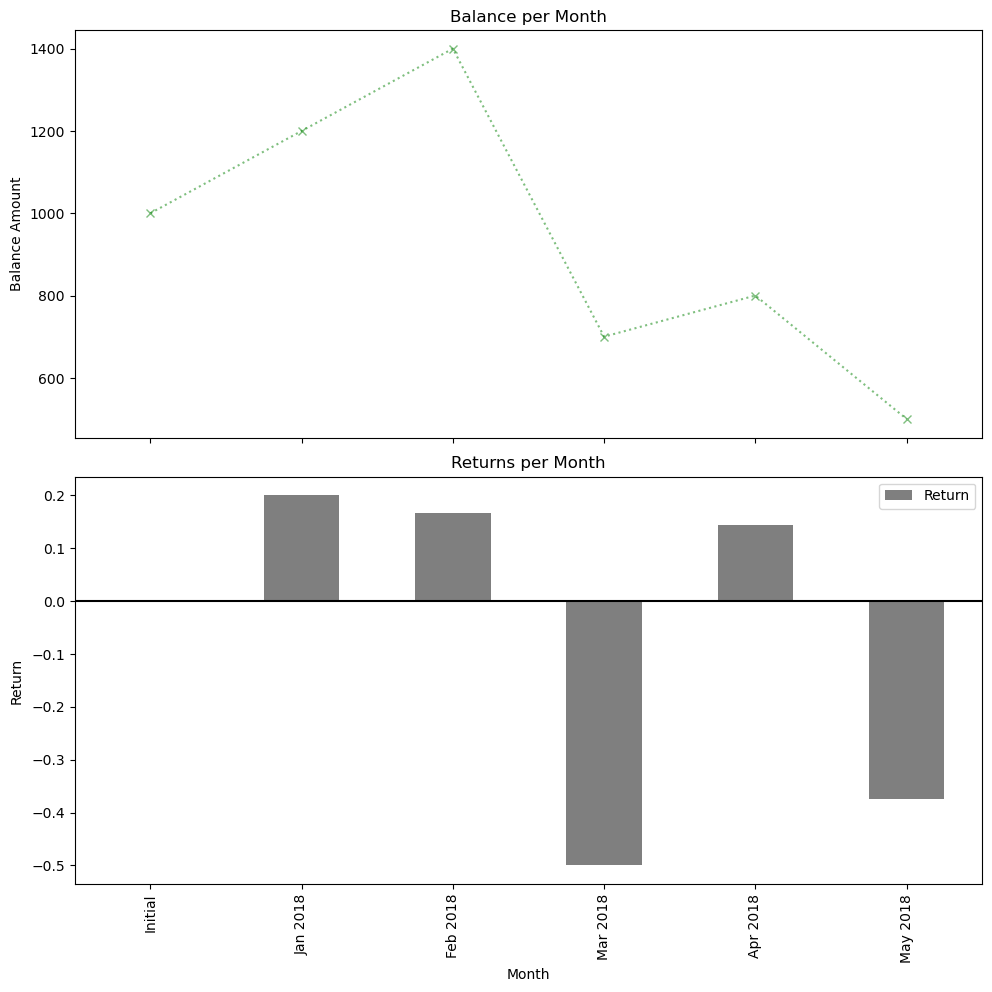

In [17]:
# Create Initial Dataframe
df = pd.DataFrame(data).T
df['Balance']= df.sum(axis=1)
df = df.iloc[:, 6:]
#df['Balance'] = df['Investment'].cumsum() --- took this out becausae of assumption of Investment v/s Balance

# Calculate Gain
df['Gain'] = df['Balance'].diff(1).fillna(0)

# Calculate Growth
df['Growth_Factor'] = df['Balance'] / df['Balance'].shift(1)

df['Return'] = df['Growth_Factor']-1
df.index.name = 'Month'

df.fillna(0)
print(df)

fig, ax = plt.subplots(nrows = 2, figsize = (10,10), sharex = True)
fig.align_labels()

df['Balance'].plot.line(ax = ax[0], color = 'green', alpha = 0.5 , linestyle = ':', marker = 'x')
df['Return'].plot.bar(ax = ax[1], color = 'k', alpha = 0.5 )

# df.plot(ax = axes[0], x=df.index, y=["Growth_Factor"], kind="bar", figsize=(9, 8))
# df.plot(ax = axes[1], x=df.index, y=["Return"], kind="bar", figsize=(9, 8))

plt.legend(loc = 'best')

ax[0].set_title('Balance per Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Balance Amount')

ax[1].set_title('Returns per Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Return')
ax[1].axhline(y=0.0, color='k', linestyle='-')


plt.tight_layout(pad=1)
plt.show()

---

## 4: Clinical disease data (40 pts)

Your boss comes to you Monday morning and says “I figured out our next step; we are going to pivot from an online craft store and become a data center for genetic disease information! I found **ClinVar** which is a repository that contains expert curated data, and it is free for the taking. This is a gold mine! Look at the file and tell me what gene and mutation combinations are classified as dangerous.”

Make sure that you only give your boss the dangerous mutations and include:

1) Gene name

2) Mutation ID number

3) Mutation Position (chromosome & position)

4) Mutation value (reference & alternate bases)

5) Clinical significance (CLNSIG)

6) Disease that is implicated

**Requirements**

1) The deliverables are the final result as a dataframe with a short discussion of any specifics. (that is, what data you would present to your boss with the explanation of your results)

2) Limit your output to the first 100 harmful mutations and tell your boss how many total harmful mutations were found in the file

3) Use the instructor-modified "clinvar_final.txt" at this link: https://drive.google.com/file/d/1Zps0YssoJbZHrn6iLte2RDLlgruhAX1s/view?usp=sharing This file was modified to be not exactly the same as 'standard' .vcf file to test your data parsing skills. **This is a large file so do NOT upload it into your github repo!**

4) Replace missing values in the dataframe with: 'Not_Given'. Print or display this (including the Not_Given count) for the column `CLNSIG` by using pandas value_counts() function (https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

5) State in your answer how you define harmful mutations

**6) Do your best on getting to above requirements and submit whatever you do before the deadline. If your work is incomplete be sure to describe the blockers that got in your way and how you might get past them (if given more time).**

7) You can use as many code blocks as you need. Please clean-up your code and make it readable for the graders!

**Hints** 
* We do not expect you to have any medical knowledge to solve this problem; look at the data, read the documentation provided, and write down your assumptions!

* Correct pseudocode will give you partial credit so start with that. 

* Map out which fields you want to extract: Are they in the same place every time? What strategy will you use to robustly extract and filter your data of interest? How do you plan to handle missing data?

* A good way to start is to print out each line, then practice parsing them to see if you can recover the fields of interest

* A starting solution for parsing .vcfs can be found here: https://gist.github.com/dceoy/99d976a2c01e7f0ba1c813778f9db744 This solution does **NOT** work due to the changes we've made but can be modified to work. As with any solution that needs modifications, it may take less time to make your own solution!

* Filter out junk and lines with no mutation data. Just focus on the data your need to deliver to your boss. 

* Pandas and NumPy parsers correctly recognize the end of each line in in the ClinVar file.

* The unit of observation of this dataset is one row per mutation.

* This is similar to a task that one of us tackled at work. You can answer the question with the information provided below or using the (partial) data dictionary file at this link: https://drive.google.com/file/d/1lx9yHdlcqmU_OlHiTUXKC_LQDqYBypH_/view?usp=sharing. Our goal is to see that you can put together a sensible plan, implement a solid parsing strategy, and document and justify the decisions that you made.

### VCF file description (Summarized from version 4.1)

```
* The VCF specification:

VCF is a text file format which contains meta-information lines, a header line, and then data lines each containing information about a position in the genome. The format also can contain genotype information on samples for each position.

* Fixed fields:

There are 8 fixed fields per record. All data lines are **tab-delimited**. In all cases, missing values are specified with a dot (‘.’). 

1. CHROM - chromosome number
2. POS - position DNA nuceleotide count (bases) along the chromosome
3. ID - The unique identifier for each mutation
4. REF - reference base(s)
5. ALT - alternate base(s)
6. FILTER - filter status
7. QUAL - quality
8. INFO - a semicolon-separated series of keys with values in the format: <key>=<data>

```
### Applicable INFO field specifications

```
GENEINFO = <Gene name>
CLNSIG =  <Clinical significance>
CLNDN = <Disease name>
```

### Sample ClinVar data (vcf file format - not exactly the same as the file to download!)

```
##fileformat=VCFv4.1
##fileDate=2019-03-19
##source=ClinVar
##reference=GRCh38							
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO
1	949523	rs786201005	C	T	.	.	GENEINFO=ISG15;CLNSIG=5
1	949696	rs672601345	C	CG	.	.	GENEINFO=ISG15;CLNSIG=5;CLNDN=Cancer
1	949739	rs672601312	G	T	.	.	GENEINFO=ISG15;CLNDBN=Cancer
1	955597	rs115173026	G	T	.	.	GENEINFO=AGRN;CLNSIG=2; CLNDN=Cancer
1	955619	rs201073369	G	C	.	.	GENEINFO=AGG;CLNDN=Heart_dis 
1	957640	rs6657048	C	T	.	.	GENEINFO=AGG;CLNSIG=3;CLNDN=Heart_dis 
1	976059	rs544749044	C	T	.	.	GENEINFO=AGG;CLNSIG=0;CLNDN=Heart_dis 
```

In [15]:
# 4) Your code here - can use as many code blocks as you would like

4) Please Write your assumptions here:

4) Findings / What would you present to your boss?